In [12]:
%run ../../src/kmeans/k_means_analysis.py

    k  silhouette  calinski_harabasz  davies_bouldin      inertia  \
0   2    0.285869         289.892108        1.605128  1980.530684   
1   3    0.259488         329.863253        1.318154  1546.717729   
2   4    0.264396         310.477393        1.239656  1331.888371   
3   5    0.234102         277.644150        1.273027  1219.715546   
4   6    0.232517         291.155582        1.263305  1049.597593   
5   7    0.232594         268.151763        1.301168   988.033647   
6   8    0.245509         275.593582        1.243138   880.401617   
7   9    0.240813         263.771146        1.217267   829.025288   
8  10    0.233687         251.762277        1.214111   789.260625   

   ari_vs_is_fair  
0       -0.024077  
1       -0.011843  
2       -0.012889  
3        0.032610  
4        0.038728  
5        0.036601  
6        0.018696  
7        0.029523  
8        0.039346  

Mejor k por criterios internos => k=2

Archivos guardados en: /home/juanfgallo/Documents/projects/academy/Mu

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

base = Path('../../assets/kmeans_output')

# File paths produced earlier
p_resumen = base / 'kmeans_resumen_por_k.csv'
p_sil = base / 'silhouette_vs_k.png'
p_ch  = base / 'ch_vs_k.png'
p_dbi = base / 'dbi_vs_k.png'
p_elb = base / 'elbow_inertia.png'
p_sizes_k2 = base / 'cluster_sizes_k2.png'

p_centroids_k2 = base / 'centroides_zscores_k2.csv'
p_perfil_k2     = base / 'perfil_unidades_originales_k2.csv'
p_rank_k2       = base / 'ranking_max_abs_z_k2.csv'

p_dist_fair_k2 = base / 'distrib_is_fair_por_cluster_k2.csv'
p_dist_cls_k2  = base / 'distrib_clasification_fairness_por_cluster_k2.csv'
p_dist_type_k2 = base / 'distrib_model_type_por_cluster_k2.csv'

# Convenience display
def show_img(path):
    from IPython.display import Image, display
    display(Image(filename=str(path)))


## 1) Metrics by *k*

In [14]:

if p_resumen.exists():
    resumen = pd.read_csv(p_resumen)
    display(resumen.head(12))
else:
    print("Missing:", p_resumen)


,Unnamed: 0,k,silhouette,calinski_harabasz,davies_bouldin,inertia,ari_vs_is_fair
0,0,2,0.285869,289.892108,1.605128,1980.530684,-0.024077
1,1,3,0.259488,329.863253,1.318154,1546.717729,-0.011843
2,2,4,0.264396,310.477393,1.239656,1331.888371,-0.012889
3,3,5,0.234102,277.644150,1.273027,1219.715546,0.032610
4,4,6,0.232517,291.155582,1.263305,1049.597593,0.038728
5,5,7,0.232594,268.151763,1.301168,988.033647,0.036601
6,6,8,0.245509,275.593582,1.243138,880.401617,0.018696
7,7,9,0.240813,263.771146,1.217267,829.025288,0.029523
8,8,10,0.233687,251.762277,1.214111,789.260625,0.039346


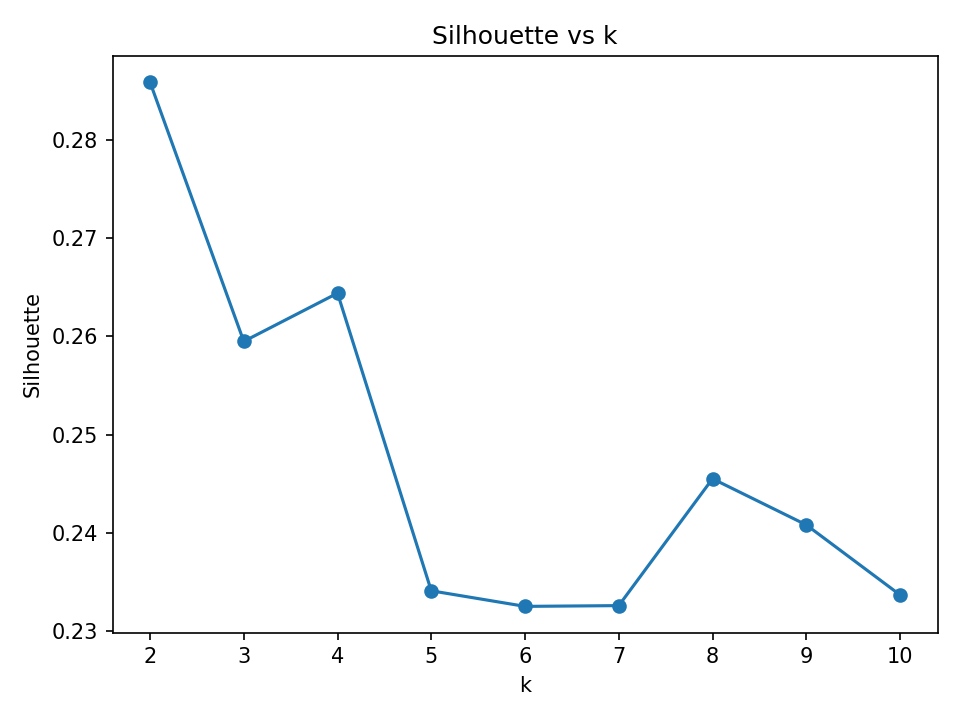

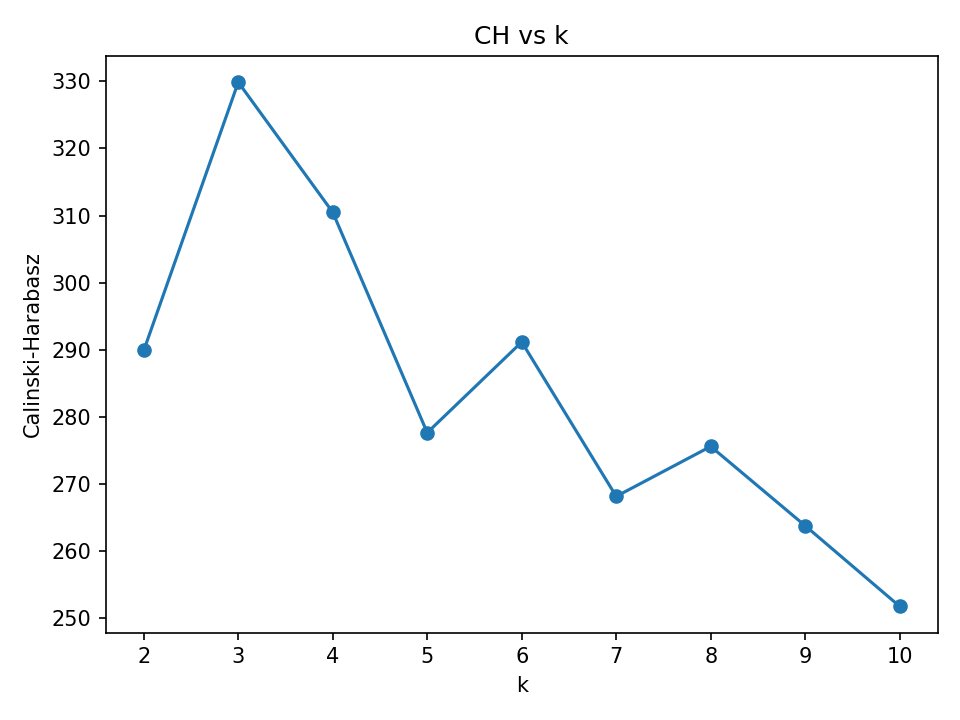

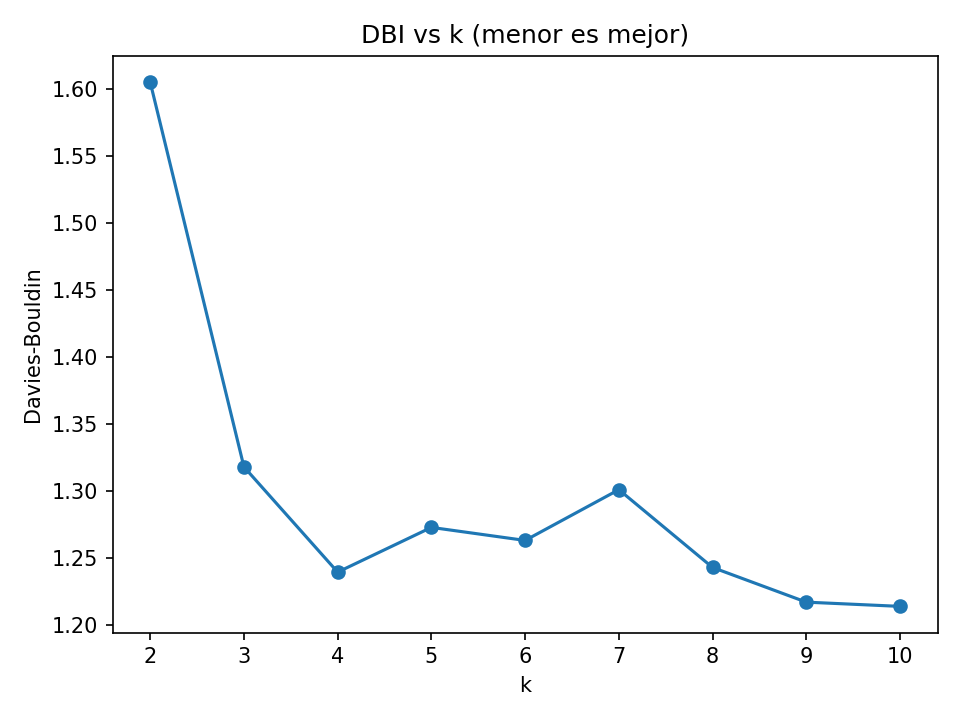

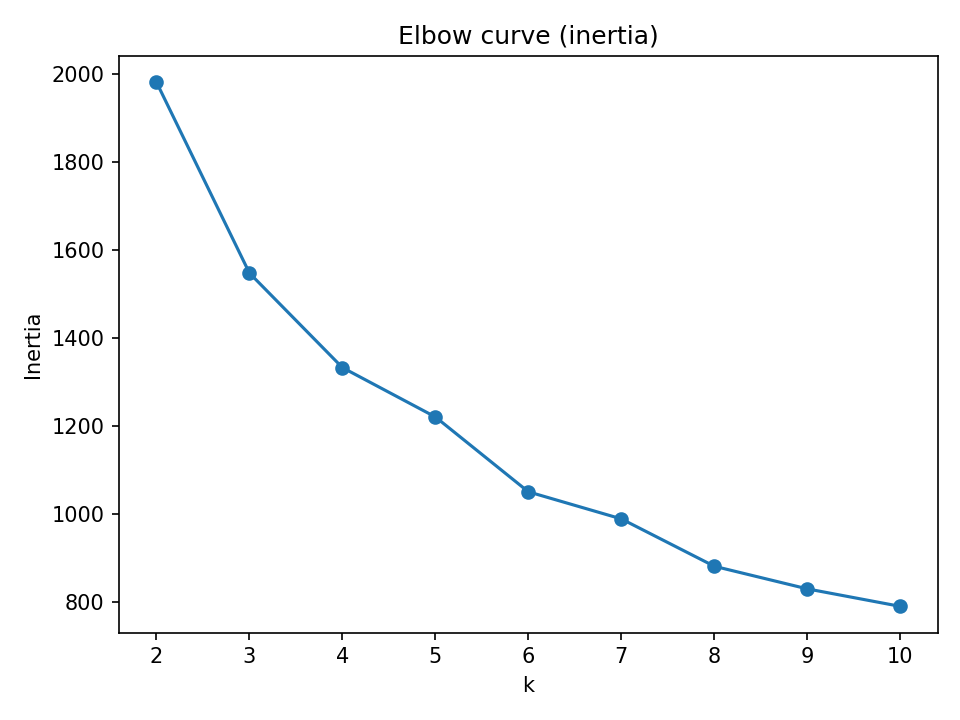

In [5]:

for p in [p_sil, p_ch, p_dbi, p_elb]:
    if p.exists():
        show_img(p)
    else:
        print("Missing:", p)


## 2) Chosen solution: **k = 2**

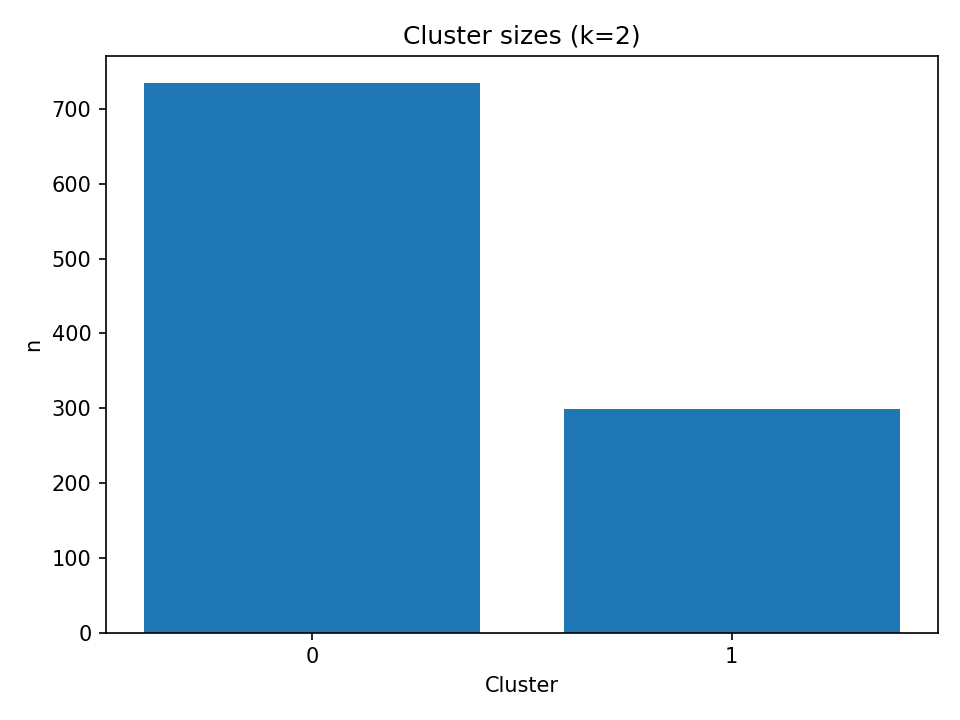

In [6]:

if p_sizes_k2.exists():
    show_img(p_sizes_k2)


### Profiles in original units (k=2)

In [7]:

if p_perfil_k2.exists():
    perfil = pd.read_csv(p_perfil_k2)
    display(perfil)
else:
    print("Missing:", p_perfil_k2)


,Unnamed: 0,performance_score,performance_score.1,performance_score.2,co2_eq_emissions,co2_eq_emissions.1,co2_eq_emissions.2,likes,likes.1,likes.2,downloads,downloads.1,downloads.2,size,size.1,size.2
0,NaN,count,mean,median,count,mean,median,count,mean,median,count,mean,median,count,mean,median
1,cluster_km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,734,0.852263368301732,0.9126393153463558,734,1.2575409451924047,0.9544315716873881,734,0.09040546383293054,0.0,734,2.1647018539304153,1.9459101490553132,734,19.973180604338058,19.8977475640674
3,1,299,0.424686377212709,0.4182061428707088,299,3.247255642015434,2.9026522393657315,299,0.09216049560402145,0.0,299,1.7567108787378496,1.6094379124341003,299,20.966988566262422,21.018276438509066


### Z-centroids (k=2)

In [8]:

if p_centroids_k2.exists():
    cent = pd.read_csv(p_centroids_k2)
    display(cent)
else:
    print("Missing:", p_centroids_k2)


,cluster_km,performance_score,co2_eq_emissions,likes,downloads,size
0,0,0.075,-0.028,0.090,0.282,-0.040
1,1,-1.033,0.840,0.092,-0.027,0.698


### Discriminative ranking by max |z| (k=2)

In [9]:

if p_rank_k2.exists():
    rank = pd.read_csv(p_rank_k2)
    display(rank)
else:
    print("Missing:", p_rank_k2)


,Unnamed: 0,max_abs_z
0,performance_score,1.033
1,co2_eq_emissions,0.840
2,size,0.698
3,downloads,0.282
4,likes,0.092


## 3) External label distributions (k=2)

In [10]:

for path in [p_dist_fair_k2, p_dist_cls_k2, p_dist_type_k2]:
    if path.exists():
        print(path.name)
        display(pd.read_csv(path, index_col=0))
    else:
        print("Missing:", path)


distrib_is_fair_por_cluster_k2.csv


,False,True
cluster_km,,
0,0.619,0.381
1,1.000,0.000


distrib_clasification_fairness_por_cluster_k2.csv


,Fair and Efficient,Green but Weak,Inefficient,Powerful but Expensive
cluster_km,,,,
0,0.381,0.241,0.098,0.279
1,0.000,0.204,0.692,0.104


distrib_model_type_por_cluster_k2.csv


,type1 (accuracy & f1),type2 (rouge),type3 (accuracy)
cluster_km,,,
0,0.869,0.038,0.093
1,0.344,0.656,0.000
